 ## World 3- Crystal Caves

This involves the following steps for two assessments:

>1.Import and Read data<br>
>2.Calculating Number of Session<br>
>3.Calculating Game time of Session<br>
>4.Calculating Game time per Session<br>
>5.Removing Outliers<br>


## Import and Read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', -1)  

In [3]:
df=pd.read_csv('../data/cyrstalcaves.csv')
score=pd.read_csv('../data/cyrstalcaves_score.csv')

In [4]:
print(df.shape)
print(score.shape)

(2215199, 11)
(7132, 7)


In [5]:
df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,2be846a18a653f7c,2019-09-13T00:30:51.223Z,"{""event_code"": 2000, ""event_count"": 1}",0006c192,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
1,7d093bf9,e6a6a262a8243ff7,2019-09-13T00:31:20.165Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""game_time"":0,""event_code"":2000}",0006c192,1,2000,0,Chow Time,Game,CRYSTALCAVES
2,f93fc684,e6a6a262a8243ff7,2019-09-13T00:31:22.262Z,"{""coordinates"":{""x"":452,""y"":680,""stage_width"":1015,""stage_height"":762},""round"":0,""event_count"":2,""game_time"":2157,""event_code"":4010}",0006c192,2,4010,2157,Chow Time,Game,CRYSTALCAVES
3,7ec0c298,e6a6a262a8243ff7,2019-09-13T00:31:24.467Z,"{""description"":""It's Chow Time! We have some VERY hungry dinosaurs waiting. Let's feed them! Big dinosaurs eat a lot of food, small dinosaurs only eat a little!"",""identifier"":""1431,1401b"",""media_type"":""animation"",""total_duration"":10333,""round"":0,""event_count"":3,""game_time"":4351,""event_code"":3010}",0006c192,3,3010,4351,Chow Time,Game,CRYSTALCAVES
4,0d1da71f,e6a6a262a8243ff7,2019-09-13T00:31:30.572Z,"{""description"":""It's Chow Time! We have some VERY hungry dinosaurs waiting. Let's feed them! Big dinosaurs eat a lot of food, small dinosaurs only eat a little!"",""identifier"":""1431,1401b"",""media_type"":""animation"",""duration"":6083,""round"":0,""event_count"":4,""game_time"":10434,""event_code"":3110}",0006c192,4,3110,10434,Chow Time,Game,CRYSTALCAVES


In [6]:
score.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,8fdd5d389d0e272e,001d0ed0,Chest Sorter (Assessment),0,1,0.0,0
1,9480b026e3e7d371,001d0ed0,Cart Balancer (Assessment),1,0,1.0,3
2,346d5f57cf40bac0,00279ac5,Chest Sorter (Assessment),0,11,0.0,0
3,113a557b60770369,002db7e3,Cart Balancer (Assessment),1,0,1.0,3
4,67f9274eb736ab3f,002db7e3,Chest Sorter (Assessment),0,5,0.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215199 entries, 0 to 2215198
Data columns (total 11 columns):
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
dtypes: int64(3), object(8)
memory usage: 185.9+ MB


In [8]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7132 entries, 0 to 7131
Data columns (total 7 columns):
game_session       7132 non-null object
installation_id    7132 non-null object
title              7132 non-null object
num_correct        7132 non-null int64
num_incorrect      7132 non-null int64
accuracy           7132 non-null float64
accuracy_group     7132 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 390.2+ KB


In [9]:
df.isnull().sum()

event_id           0
game_session       0
timestamp          0
event_data         0
installation_id    0
event_count        0
event_code         0
game_time          0
title              0
type               0
world              0
dtype: int64

In [10]:
score.isnull().sum()

game_session       0
installation_id    0
title              0
num_correct        0
num_incorrect      0
accuracy           0
accuracy_group     0
dtype: int64

In [11]:
#converting the timestamp column into timestamp format
df['timestamp']=pd.to_datetime(df['timestamp'])

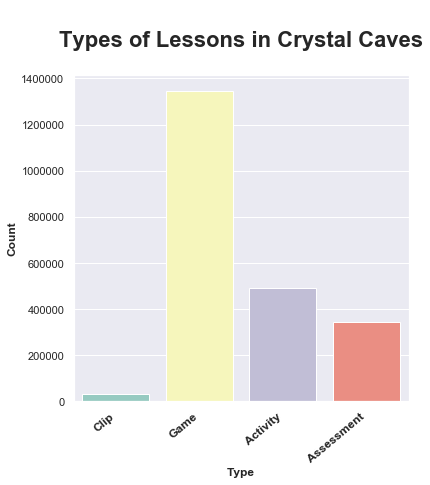

In [12]:
# types of lessons in this world
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
ax=sns.countplot(df['type'],palette="Set3")
plt.title('\nTypes of Lessons in Crystal Caves\n',
         fontdict= {
        'weight' : 'bold',
        'size'   : 22});
plt.xlabel('Type',fontdict= {
        'weight' : 'bold',
        'size'   : 12})
plt.ylabel('Count',fontdict= {
        'weight' : 'bold',
        'size'   : 12});# number of gane sessions in this dataframe
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict= {
        'weight' : 'bold',
        'size'   : 12});

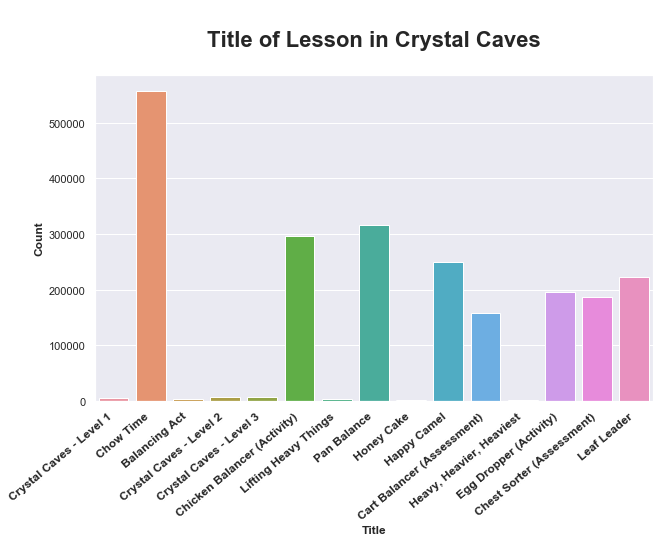

In [13]:
#title of each lesson in this world
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
plt.title('\nTitle of Lesson in Crystal Caves\n',
         fontdict= {
        'weight' : 'bold',
        'size'   : 22})
ax=sns.countplot(df['title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict= {
        'weight' : 'bold',
        'size'   : 12});
plt.xlabel('Title',fontdict= {
        'weight' : 'bold',
        'size'   : 12})
plt.ylabel('Count',fontdict= {
        'weight' : 'bold',
        'size'   : 12}); # number of sessions played by user

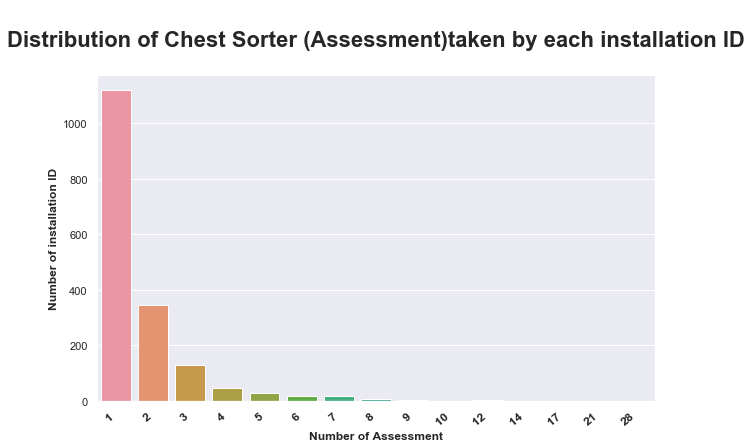

In [14]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))

ax=sns.countplot(score[score['title']=='Chest Sorter (Assessment)'].groupby('installation_id').game_session.nunique().sort_values());
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict= {
        'weight' : 'bold',
        'size'   : 12});
plt.title('\nDistribution of Chest Sorter (Assessment)taken by each installation ID\n',
          fontdict= {
        'weight' : 'bold',
        'size'   : 22})
plt.xlabel('Number of Assessment',fontdict= {
        'weight' : 'bold',
        'size'   : 12})
plt.ylabel('Number of installation ID',fontdict= {
        'weight' : 'bold',
        'size'   : 12});

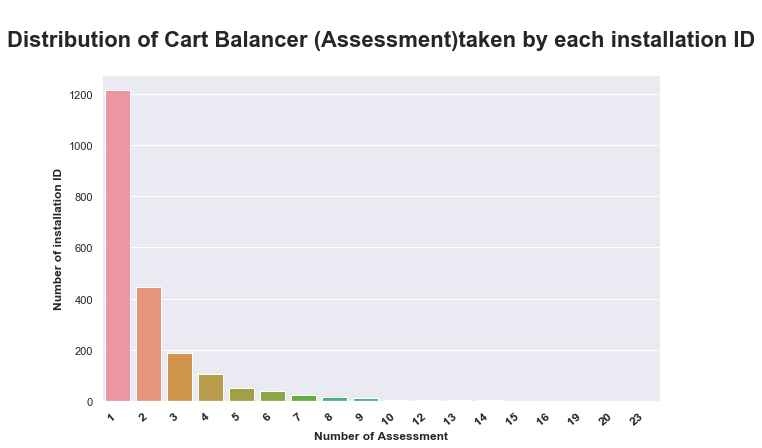

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))

ax=sns.countplot(score[score['title']=='Cart Balancer (Assessment)'].groupby('installation_id').game_session.nunique().sort_values());
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict= {
        'weight' : 'bold',
        'size'   : 12});
plt.title('\nDistribution of Cart Balancer (Assessment)taken by each installation ID\n',
          fontdict= {
        'weight' : 'bold',
        'size'   : 22})
plt.xlabel('Number of Assessment',fontdict= {
        'weight' : 'bold',
        'size'   : 12})
plt.ylabel('Number of installation ID',fontdict= {
        'weight' : 'bold',
        'size'   : 12});

***Dividing the CrystalCaves score dataframe into two based on assessments***

In [16]:
# creating a new database only with Chest Sorter (Assessment)
score_cs=score[score['title']=='Chest Sorter (Assessment)']
score_cs.shape

(2981, 7)

In [17]:
score_cs['installation_id'].nunique()

1724

In [18]:
# creating a new database only with Cart Balancer (Assessment)
score_cb=score[score['title']=='Cart Balancer (Assessment)']
score_cb.shape

(4151, 7)

In [19]:
score_cb['installation_id'].nunique()

2100

# Chest Sorter (Assessment)

In [20]:
# removing the installation_id in df which do not have accuracy group(grades) in score-dataframe
id=score_cs['installation_id'].unique()
df_cs=df[df.installation_id.isin(id)]
df_cs.shape

(1650034, 11)

In [21]:
#number of unique installation_id in df after removing id without accuracy group
# is equal to number of unique installation id in score
print(df_cs['installation_id'].nunique())
print(score_cs['installation_id'].nunique())

1724
1724


## Calculating Number of Session

***Number of times each user has played a lesson before taking first Assessment***

In [22]:
# A user can take assessment multiple times.
#Score dataframe gives Accuracy_group (grades) only for few of the assessments
# Assessment without accuracy_group will not be useful for modelling
#Hence creating a new dataframe which has game_sessions specified in score dataframe
gs=score_cs['game_session'].unique()
time=df_cs[df_cs.game_session.isin(gs)]
time.shape

(177637, 11)

In [23]:
# creating a new dataframe with installation_id,game_session of asssessment, maximum timestamp of assessment in df  
ts_gs=time.groupby(['installation_id','game_session']).timestamp.max()
ts_gs=pd.DataFrame(ts_gs)
ts_gs.head()

timestamp
installation_id game_session                                     
001d0ed0        8fdd5d389d0e272e 2019-09-05 14:29:16.342000+00:00
00279ac5        346d5f57cf40bac0 2019-08-09 18:47:52.802000+00:00
002db7e3        67f9274eb736ab3f 2019-08-07 20:41:03.806000+00:00
                f50104895c55045f 2019-08-08 00:06:18.437000+00:00
003372b0        4649b29840d5b0f1 2019-09-26 13:57:45.443000+00:00

In [24]:
#reset index 
ts_gs.reset_index(inplace=True)
ts_gs.rename(columns={'timestamp': 'ts'}, inplace=True)
print(ts_gs.shape)
ts_gs.head()

(2981, 3)


,installation_id,game_session,ts
0,001d0ed0,8fdd5d389d0e272e,2019-09-05 14:29:16.342000+00:00
1,00279ac5,346d5f57cf40bac0,2019-08-09 18:47:52.802000+00:00
2,002db7e3,67f9274eb736ab3f,2019-08-07 20:41:03.806000+00:00
3,002db7e3,f50104895c55045f,2019-08-08 00:06:18.437000+00:00
4,003372b0,4649b29840d5b0f1,2019-09-26 13:57:45.443000+00:00


In [25]:
# retaining only one game_session per installation_id
# considering only the first assessment taken by installation_id
# timestamp (.min) will give the first assessment taken by user
ts=ts_gs.groupby('installation_id').ts.min()
ts=pd.DataFrame(ts)
ts.reset_index(inplace=True)

In [26]:
print(ts.shape)
ts.head()

(1724, 2)


,installation_id,ts
0,001d0ed0,2019-09-05 14:29:16.342000+00:00
1,00279ac5,2019-08-09 18:47:52.802000+00:00
2,002db7e3,2019-08-07 20:41:03.806000+00:00
3,003372b0,2019-09-26 13:57:45.443000+00:00
4,00634433,2019-10-09 20:42:34.763000+00:00


In [27]:
#score_ts - ts and game_session of first assessment taken by installation_id
score_ts=ts.merge(ts_gs)#merging the ts and ts_gs 
print(score_ts.shape)
score_ts.head(2)

(1724, 3)


,installation_id,ts,game_session
0,001d0ed0,2019-09-05 14:29:16.342000+00:00,8fdd5d389d0e272e
1,00279ac5,2019-08-09 18:47:52.802000+00:00,346d5f57cf40bac0


In [28]:
#final score dataframe-which has all the information about first assessment taken by each installation_id
final_score_cs=pd.merge(score_cs,score_ts)
print(final_score_cs.shape)
final_score_cs.head(2)

(1724, 8)


,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group,ts
0,8fdd5d389d0e272e,001d0ed0,Chest Sorter (Assessment),0,1,0.0,0,2019-09-05 14:29:16.342000+00:00
1,346d5f57cf40bac0,00279ac5,Chest Sorter (Assessment),0,11,0.0,0,2019-08-09 18:47:52.802000+00:00


In [29]:
#the number of rows is equal to unique installation_id (one row per installation_id)
final_score_cs['installation_id'].nunique()

1724

In [30]:
# dropping the column -title (as its value is  same for all the rows) and 
# game_session and ts,which is not needed anymore
final_score_cs.drop(columns=['title','game_session','ts'],inplace=True)
final_score_cs.head()

,installation_id,num_correct,num_incorrect,accuracy,accuracy_group
0,001d0ed0,0,1,0.0,0
1,00279ac5,0,11,0.0,0
2,002db7e3,0,5,0.0,0
3,003372b0,0,4,0.0,0
4,00634433,0,1,0.0,0


In [31]:
# merging timestamp dataframe with first assessment to original df_bm dataframe
final_cs=pd.merge(df_cs,ts) #merging df_bm and ts dataframe
print(final_cs.shape)
final_cs.head(2)

(1650034, 12)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,ts
0,27253bdc,8d9efce2e9618d80,2019-09-05 14:08:46.993000+00:00,"{""event_code"": 2000, ""event_count"": 1}",001d0ed0,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES,2019-09-05 14:29:16.342000+00:00
1,7d093bf9,54a99e54dc68ee6b,2019-09-05 14:11:57.868000+00:00,"{""version"":""1.0"",""round"":0,""event_count"":1,""game_time"":0,""event_code"":2000}",001d0ed0,1,2000,0,Chow Time,Game,CRYSTALCAVES,2019-09-05 14:29:16.342000+00:00


In [32]:
#retaining only the lesson done before the first assessment
final_cs=final_cs[final_cs['timestamp']<=final_cs['ts']]

In [33]:
# creating a new dataframe by grouping installation_id and title 
#to get the count of number of sessions played by each user
final_df_cs=final_cs.groupby(['installation_id','title']).game_session.nunique().unstack()
final_df_cs=pd.DataFrame(final_df_cs)
print(final_df_cs.shape)
final_df_cs.head()

(1724, 15)


title,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance
installation_id,,,,,,,,,,,,,,,
001d0ed0,1.0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,1.0
00279ac5,NaN,NaN,1.0,NaN,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0
002db7e3,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,2.0,1.0
003372b0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,1.0
00634433,NaN,1.0,1.0,NaN,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#reset index
final_df_cs=final_df_cs.reset_index()
final_df_cs.head(1)

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance
0,001d0ed0,1.0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,1.0


In [35]:
final_df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 16 columns):
installation_id                1724 non-null object
Balancing Act                  692 non-null float64
Cart Balancer (Assessment)     1242 non-null float64
Chest Sorter (Assessment)      1724 non-null float64
Chicken Balancer (Activity)    750 non-null float64
Chow Time                      1009 non-null float64
Crystal Caves - Level 1        1279 non-null float64
Crystal Caves - Level 2        1405 non-null float64
Crystal Caves - Level 3        1480 non-null float64
Egg Dropper (Activity)         1050 non-null float64
Happy Camel                    826 non-null float64
Heavy, Heavier, Heaviest       612 non-null float64
Honey Cake                     607 non-null float64
Leaf Leader                    852 non-null float64
Lifting Heavy Things           653 non-null float64
Pan Balance                    948 non-null float64
dtypes: float64(15), object(1)
memory usage: 215.6+ KB

In [36]:
# filling all na with 0, because the user has not attempted the lesson
final_df_cs.fillna(0, inplace=True)

In [37]:
#converting the float columns into integer
numerical_columns=[col for col in final_df_cs.columns if final_df_cs[col].dtype != 'O']
for x in numerical_columns:
    final_df_cs[x]=final_df_cs[x].astype(int)
final_df_cs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 16 columns):
installation_id                1724 non-null object
Balancing Act                  1724 non-null int64
Cart Balancer (Assessment)     1724 non-null int64
Chest Sorter (Assessment)      1724 non-null int64
Chicken Balancer (Activity)    1724 non-null int64
Chow Time                      1724 non-null int64
Crystal Caves - Level 1        1724 non-null int64
Crystal Caves - Level 2        1724 non-null int64
Crystal Caves - Level 3        1724 non-null int64
Egg Dropper (Activity)         1724 non-null int64
Happy Camel                    1724 non-null int64
Heavy, Heavier, Heaviest       1724 non-null int64
Honey Cake                     1724 non-null int64
Leaf Leader                    1724 non-null int64
Lifting Heavy Things           1724 non-null int64
Pan Balance                    1724 non-null int64
dtypes: int64(15), object(1)
memory usage: 215.6+ KB


In [38]:
final_df_cs.head()

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance
0,001d0ed0,1,2,1,0,1,1,1,1,1,1,1,2,0,2,1
1,00279ac5,0,0,1,0,2,2,2,2,1,1,0,0,1,0,1
2,002db7e3,0,0,1,1,1,2,1,1,0,1,0,1,0,2,1
3,003372b0,1,2,1,1,1,1,1,1,1,1,1,2,1,4,1
4,00634433,0,1,1,0,1,1,2,1,0,0,0,0,0,0,0


In [39]:
# dropping the columns -'Cart Balancer (Assessment)','Chest Sorter (Assessment)'
#which gives the count of number of assessment taken by user,
# as only the first assessment is considered
final_df_cs.drop(columns=['Cart Balancer (Assessment)','Chest Sorter (Assessment)'],inplace=True)


In [40]:
final_df_cs.head()

title,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance
0,001d0ed0,1,0,1,1,1,1,1,1,1,2,0,2,1
1,00279ac5,0,0,2,2,2,2,1,1,0,0,1,0,1
2,002db7e3,0,1,1,2,1,1,0,1,0,1,0,2,1
3,003372b0,1,1,1,1,1,1,1,1,1,2,1,4,1
4,00634433,0,0,1,1,2,1,0,0,0,0,0,0,0


## Calculating Game time of Session

***Time for each lesson per user, before taking first Assessment***

In [41]:
#calculating the game time for each title
final_gt_cs=final_cs.groupby(['installation_id','game_session','title']).game_time.max().unstack()
final_gt_cs=pd.DataFrame(final_gt_cs)
print(final_gt_cs.shape)

(21968, 15)


In [42]:
final_gt_cs.head()

title                             Balancing Act  Cart Balancer (Assessment)  \
installation_id game_session                                                  
001d0ed0        07e69cee783a0a42 NaN            NaN                           
                08ce481c27ebbfd8 NaN            NaN                           
                2bfbe94616f79189 NaN            NaN                           
                30b6c918528478aa NaN            NaN                           
                3d311f718cff204d NaN            NaN                           

title                             Chest Sorter (Assessment)  \
installation_id game_session                                  
001d0ed0        07e69cee783a0a42 NaN                          
                08ce481c27ebbfd8 NaN                          
                2bfbe94616f79189 NaN                          
                30b6c918528478aa NaN                          
                3d311f718cff204d NaN                          

title                             Chicken Balancer (Activity)  Chow Time  \
installation_id game_session                                               
001d0ed0        07e69cee783a0a42 NaN                          NaN          
                08ce481c27ebbfd8 NaN                          NaN          
                2bfbe94616f79189 NaN                          NaN          
                30b6c918528478aa NaN                          NaN          
                3d311f718cff204d NaN                          NaN          

title                             Crystal Caves - Level 1  \
installation_id game_session                                
001d0ed0        07e69cee783a0a42 NaN                        
                08ce481c27ebbfd8 NaN                        
                2bfbe94616f79189 NaN                        
                30b6c918528478aa NaN                        
                3d311f718cff204d NaN                        

title                             Crystal Caves - Level 2  \
installation_id game_session                                
001d0ed0        07e69cee783a0a42 NaN                        
                08ce481c27ebbfd8 NaN                        
                2bfbe94616f79189  0.0                       
                30b6c918528478aa NaN                        
                3d311f718cff204d NaN                        

title                             Crystal Caves - Level 3  \
installation_id game_session                                
001d0ed0        07e69cee783a0a42  0.0                       
                08ce481c27ebbfd8 NaN                        
                2bfbe94616f79189 NaN                        
                30b6c918528478aa NaN                        
                3d311f718cff204d NaN                        

title                             Egg Dropper (Activity)  Happy Camel  \
installation_id game_session                                            
001d0ed0        07e69cee783a0a42 NaN                     NaN            
                08ce481c27ebbfd8  28679.0                NaN            
                2bfbe94616f79189 NaN                     NaN            
                30b6c918528478aa NaN                     NaN            
                3d311f718cff204d NaN                     NaN            

title                             Heavy, Heavier, Heaviest  Honey Cake  \
installation_id game_session                                             
001d0ed0        07e69cee783a0a42 NaN                       NaN           
                08ce481c27ebbfd8 NaN                       NaN           
                2bfbe94616f79189 NaN                       NaN           
                30b6c918528478aa NaN                       NaN           
                3d311f718cff204d NaN                        0.0          

title                             Leaf Leader  Lifting Heavy Things  \
installation_id game_session                                          
001d0ed0      

In [43]:
# filling all na with 0, because the user has not attempted the lesson
final_gt_cs.fillna(0, inplace=True)

In [44]:
#reset index
final_gt_cs=final_gt_cs.reset_index()
final_gt_cs.head()

title,installation_id,game_session,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance
0,001d0ed0,07e69cee783a0a42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,001d0ed0,08ce481c27ebbfd8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28679.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001d0ed0,2bfbe94616f79189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001d0ed0,30b6c918528478aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133730.0
4,001d0ed0,3d311f718cff204d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#calculating the total gametime
final_gt_cs=final_gt_cs.groupby(['installation_id'])['Balancing Act', 'Cart Balancer (Assessment)',
       'Chest Sorter (Assessment)', 'Chicken Balancer (Activity)', 'Chow Time',
       'Crystal Caves - Level 1', 'Crystal Caves - Level 2',
       'Crystal Caves - Level 3', 'Egg Dropper (Activity)', 'Happy Camel',
       'Heavy, Heavier, Heaviest', 'Honey Cake', 'Leaf Leader',
       'Lifting Heavy Things', 'Pan Balance'].sum()

In [46]:
final_gt_cs=final_gt_cs.reset_index()

In [47]:
final_gt_cs.head()

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance
0,001d0ed0,0.0,28399.0,38115.0,0.0,74782.0,0.0,0.0,0.0,28679.0,59079.0,0.0,0.0,0.0,0.0,133730.0
1,00279ac5,0.0,0.0,485348.0,0.0,1648489.0,0.0,0.0,0.0,108453.0,86961.0,0.0,0.0,288619.0,0.0,46118.0
2,002db7e3,0.0,0.0,50370.0,196759.0,266822.0,0.0,0.0,0.0,0.0,60842.0,0.0,0.0,0.0,0.0,113344.0
3,003372b0,0.0,57944.0,64373.0,89110.0,181016.0,0.0,0.0,0.0,86840.0,148315.0,0.0,0.0,61938.0,0.0,109645.0
4,00634433,0.0,30507.0,96193.0,0.0,152653.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
final_gt_cs[final_gt_cs['Balancing Act']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [49]:
final_gt_cs[final_gt_cs['Crystal Caves - Level 1']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [50]:
final_gt_cs[final_gt_cs['Crystal Caves - Level 2']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [51]:
final_gt_cs[final_gt_cs['Crystal Caves - Level 3']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [52]:
final_gt_cs[final_gt_cs['Heavy, Heavier, Heaviest']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [53]:
final_gt_cs[final_gt_cs['Honey Cake']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [54]:
final_gt_cs[final_gt_cs['Lifting Heavy Things']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [55]:
#dropping the columns, as game_time is zero for all rows
#dropping Cart Balancer (Assessment as its not relevant
final_gt_cs.drop(columns=['Lifting Heavy Things','Honey Cake',
                          'Heavy, Heavier, Heaviest','Crystal Caves - Level 3',
                          'Crystal Caves - Level 2','Crystal Caves - Level 1',
                          'Balancing Act','Cart Balancer (Assessment)'],inplace=True)

In [56]:
#converting the gametime from milliseconds to minutes
for i in final_gt_cs.columns:
    if i!='installation_id':
        final_gt_cs[i]=round(final_gt_cs[i]/60000,2)

In [57]:
final_gt_cs.head()

title,installation_id,Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Egg Dropper (Activity),Happy Camel,Leaf Leader,Pan Balance
0,001d0ed0,0.64,0.00,1.25,0.48,0.98,0.00,2.23
1,00279ac5,8.09,0.00,27.47,1.81,1.45,4.81,0.77
2,002db7e3,0.84,3.28,4.45,0.00,1.01,0.00,1.89
3,003372b0,1.07,1.49,3.02,1.45,2.47,1.03,1.83
4,00634433,1.60,0.00,2.54,0.00,0.00,0.00,0.00


In [58]:
#adding '_t' to all column names ,to merge with final_df dataframe
for i in final_gt_cs.columns:
    if i!='installation_id':
        final_gt_cs.rename(columns={i: i+'_t'},inplace=True)

In [59]:
final_gt_cs.head()

title,installation_id,Chest Sorter (Assessment)_t,Chicken Balancer (Activity)_t,Chow Time_t,Egg Dropper (Activity)_t,Happy Camel_t,Leaf Leader_t,Pan Balance_t
0,001d0ed0,0.64,0.00,1.25,0.48,0.98,0.00,2.23
1,00279ac5,8.09,0.00,27.47,1.81,1.45,4.81,0.77
2,002db7e3,0.84,3.28,4.45,0.00,1.01,0.00,1.89
3,003372b0,1.07,1.49,3.02,1.45,2.47,1.03,1.83
4,00634433,1.60,0.00,2.54,0.00,0.00,0.00,0.00


In [60]:
#merging the two dataframe into final dataframe
final_cs=pd.merge(final_df_cs,final_gt_cs)

In [61]:
final_cs.head()

title,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Chest Sorter (Assessment)_t,Chicken Balancer (Activity)_t,Chow Time_t,Egg Dropper (Activity)_t,Happy Camel_t,Leaf Leader_t,Pan Balance_t
0,001d0ed0,1,0,1,1,1,1,1,1,1,2,0,2,1,0.64,0.00,1.25,0.48,0.98,0.00,2.23
1,00279ac5,0,0,2,2,2,2,1,1,0,0,1,0,1,8.09,0.00,27.47,1.81,1.45,4.81,0.77
2,002db7e3,0,1,1,2,1,1,0,1,0,1,0,2,1,0.84,3.28,4.45,0.00,1.01,0.00,1.89
3,003372b0,1,1,1,1,1,1,1,1,1,2,1,4,1,1.07,1.49,3.02,1.45,2.47,1.03,1.83
4,00634433,0,0,1,1,2,1,0,0,0,0,0,0,0,1.60,0.00,2.54,0.00,0.00,0.00,0.00


In [62]:
final_cs.shape

(1724, 21)

In [63]:
#merging the final dataframes into result 

result_cs=pd.merge(final_cs,final_score_cs)
print(result_cs.shape)
result_cs.head()

(1724, 25)


,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Chest Sorter (Assessment)_t,Chicken Balancer (Activity)_t,Chow Time_t,Egg Dropper (Activity)_t,Happy Camel_t,Leaf Leader_t,Pan Balance_t,num_correct,num_incorrect,accuracy,accuracy_group
0,001d0ed0,1,0,1,1,1,1,1,1,1,2,0,2,1,0.64,0.00,1.25,0.48,0.98,0.00,2.23,0,1,0.0,0
1,00279ac5,0,0,2,2,2,2,1,1,0,0,1,0,1,8.09,0.00,27.47,1.81,1.45,4.81,0.77,0,11,0.0,0
2,002db7e3,0,1,1,2,1,1,0,1,0,1,0,2,1,0.84,3.28,4.45,0.00,1.01,0.00,1.89,0,5,0.0,0
3,003372b0,1,1,1,1,1,1,1,1,1,2,1,4,1,1.07,1.49,3.02,1.45,2.47,1.03,1.83,0,4,0.0,0
4,00634433,0,0,1,1,2,1,0,0,0,0,0,0,0,1.60,0.00,2.54,0.00,0.00,0.00,0.00,0,1,0.0,0


## Calculating Game time per Session

***Game time per lesson for each user***

In [64]:
result_cs.columns

Index(['installation_id', 'Balancing Act', 'Chicken Balancer (Activity)',
       'Chow Time', 'Crystal Caves - Level 1', 'Crystal Caves - Level 2',
       'Crystal Caves - Level 3', 'Egg Dropper (Activity)', 'Happy Camel',
       'Heavy, Heavier, Heaviest', 'Honey Cake', 'Leaf Leader',
       'Lifting Heavy Things', 'Pan Balance', 'Chest Sorter (Assessment)_t',
       'Chicken Balancer (Activity)_t', 'Chow Time_t',
       'Egg Dropper (Activity)_t', 'Happy Camel_t', 'Leaf Leader_t',
       'Pan Balance_t', 'num_correct', 'num_incorrect', 'accuracy',
       'accuracy_group'],
      dtype='object')

In [65]:
result_cs['Chicken Balancer (Activity)']=result_cs['Chicken Balancer (Activity)_t']/result_cs['Chicken Balancer (Activity)']
result_cs['Chow Time']=result_cs['Chow Time_t']/result_cs['Chow Time']
result_cs['Egg Dropper (Activity)']=result_cs['Egg Dropper (Activity)_t']/result_cs['Egg Dropper (Activity)']
result_cs['Happy Camel']=result_cs['Happy Camel_t']/result_cs['Happy Camel']
result_cs['Leaf Leader']=result_cs['Leaf Leader_t']/result_cs['Leaf Leader']
result_cs['Pan Balance']=result_cs['Pan Balance_t']/result_cs['Pan Balance']


In [66]:
result_cs.head()

,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Chest Sorter (Assessment)_t,Chicken Balancer (Activity)_t,Chow Time_t,Egg Dropper (Activity)_t,Happy Camel_t,Leaf Leader_t,Pan Balance_t,num_correct,num_incorrect,accuracy,accuracy_group
0,001d0ed0,1,NaN,1.250,1,1,1,0.48,0.98,1,2,NaN,2,2.23,0.64,0.00,1.25,0.48,0.98,0.00,2.23,0,1,0.0,0
1,00279ac5,0,NaN,13.735,2,2,2,1.81,1.45,0,0,4.81,0,0.77,8.09,0.00,27.47,1.81,1.45,4.81,0.77,0,11,0.0,0
2,002db7e3,0,3.28,4.450,2,1,1,NaN,1.01,0,1,NaN,2,1.89,0.84,3.28,4.45,0.00,1.01,0.00,1.89,0,5,0.0,0
3,003372b0,1,1.49,3.020,1,1,1,1.45,2.47,1,2,1.03,4,1.83,1.07,1.49,3.02,1.45,2.47,1.03,1.83,0,4,0.0,0
4,00634433,0,NaN,2.540,1,2,1,NaN,NaN,0,0,NaN,0,NaN,1.60,0.00,2.54,0.00,0.00,0.00,0.00,0,1,0.0,0


In [67]:
#dropping unwanted columns
result_cs.drop(columns=['Chicken Balancer (Activity)_t', 'Chow Time_t',
       'Egg Dropper (Activity)_t', 'Happy Camel_t', 'Leaf Leader_t',
       'Pan Balance_t',],inplace=True)

In [68]:
# filling all na and inf with 0, because the user has not attempted the lesson
# result.replace([np.inf], np.nan,inplace=True)
result_cs.fillna(0, inplace=True)

In [69]:
result_cs.isnull().sum()

installation_id                0
Balancing Act                  0
Chicken Balancer (Activity)    0
Chow Time                      0
Crystal Caves - Level 1        0
Crystal Caves - Level 2        0
Crystal Caves - Level 3        0
Egg Dropper (Activity)         0
Happy Camel                    0
Heavy, Heavier, Heaviest       0
Honey Cake                     0
Leaf Leader                    0
Lifting Heavy Things           0
Pan Balance                    0
Chest Sorter (Assessment)_t    0
num_correct                    0
num_incorrect                  0
accuracy                       0
accuracy_group                 0
dtype: int64

In [70]:
result_cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1724 entries, 0 to 1723
Data columns (total 19 columns):
installation_id                1724 non-null object
Balancing Act                  1724 non-null int64
Chicken Balancer (Activity)    1724 non-null float64
Chow Time                      1724 non-null float64
Crystal Caves - Level 1        1724 non-null int64
Crystal Caves - Level 2        1724 non-null int64
Crystal Caves - Level 3        1724 non-null int64
Egg Dropper (Activity)         1724 non-null float64
Happy Camel                    1724 non-null float64
Heavy, Heavier, Heaviest       1724 non-null int64
Honey Cake                     1724 non-null int64
Leaf Leader                    1724 non-null float64
Lifting Heavy Things           1724 non-null int64
Pan Balance                    1724 non-null float64
Chest Sorter (Assessment)_t    1724 non-null float64
num_correct                    1724 non-null int64
num_incorrect                  1724 non-null int64
accuracy   

In [71]:
#rounding the values to 3 digits
for i in result_cs.columns:
    if (i!='installation_id'):
        result_cs[i]=round(result_cs[i],3)

In [72]:
result_cs.head()

,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Chest Sorter (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
0,001d0ed0,1,0.00,1.250,1,1,1,0.48,0.98,1,2,0.00,2,2.23,0.64,0,1,0.0,0
1,00279ac5,0,0.00,13.735,2,2,2,1.81,1.45,0,0,4.81,0,0.77,8.09,0,11,0.0,0
2,002db7e3,0,3.28,4.450,2,1,1,0.00,1.01,0,1,0.00,2,1.89,0.84,0,5,0.0,0
3,003372b0,1,1.49,3.020,1,1,1,1.45,2.47,1,2,1.03,4,1.83,1.07,0,4,0.0,0
4,00634433,0,0.00,2.540,1,2,1,0.00,0.00,0,0,0.00,0,0.00,1.60,0,1,0.0,0


## Removing Outliers

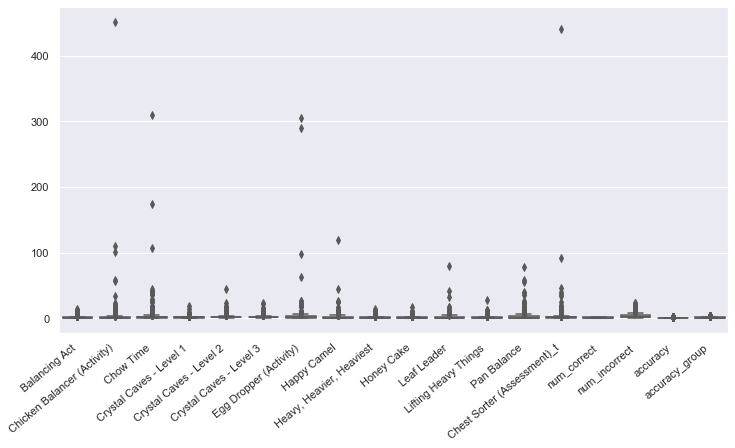

In [73]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=result_cs , orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [74]:
#removing rows , where the user has played a session more than 15 minutes
for i in result_cs.columns:
    if (i!='installation_id'):
        result_cs=result_cs[result_cs[i]<=15]
print(result_cs.shape)

(1629, 19)


In [75]:
result_cs.describe()

,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Chest Sorter (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
count,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000
mean,0.669122,0.839388,1.349324,1.061387,1.381215,1.387968,1.479866,0.989139,0.492940,0.488643,1.164018,0.580110,1.447657,1.181995,0.375077,2.863106,0.224079,0.755064
std,1.216355,1.397824,1.818192,0.996881,1.479646,1.447018,1.727454,1.434601,0.926397,0.844494,1.637934,1.028105,2.023296,0.943979,0.484291,2.556063,0.361061,1.119207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.045000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325000,0.950000,0.000000,2.000000,0.000000,0.000000
75%,1.000000,1.415000,1.890000,1.000000,2.000000,2.000000,2.480000,1.800000,1.000000,1.000000,2.030000,1.000000,2.460000,1.390000,1.000000,4.000000,0.333000,1.000000
max,14.000000,14.575000,13.735000,14.000000,14.000000,15.000000,11.300000,13.760000,14.000000,11.000000,13.260000,13.000000,14.870000,11.980000,1.000000,15.000000,1.000000,3.000000


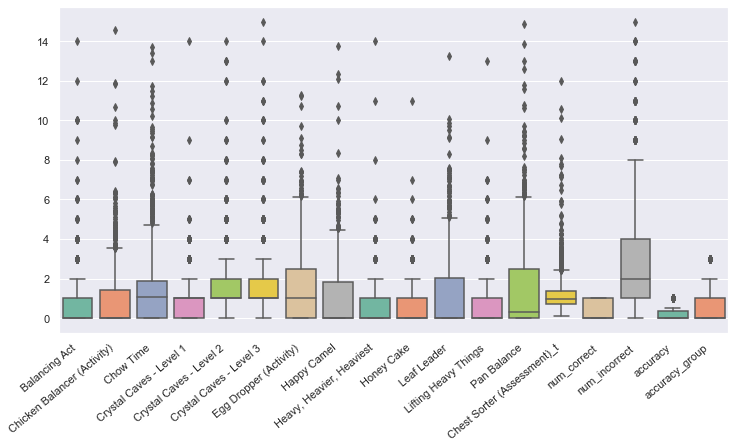

In [76]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=result_cs , orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [77]:
result_cs.shape

(1629, 19)

# Cart Balancer (Assessment)

In [78]:
# removing the installation_id in df which do not have accuracy group(grades) in score-dataframe
id=score_cb['installation_id'].unique()
df_cb=df[df.installation_id.isin(id)]
df_cb.shape

(1826344, 11)

In [79]:
#number of unique installation_id in df after removing id without accuracy group
# is equal to number of unique installation id in score
print(df_cb['installation_id'].nunique())
print(score_cb['installation_id'].nunique())

2100
2100


## Calculating Number of Session

***Number of times each user has played a lesson before taking first Assessment***

In [80]:
# A user can take assessment multiple times.
#Score dataframe gives Accuracy_group (grades) only for few of the assessments
# Assessment without accuracy_group will not be useful for modelling
#Hence creating a new dataframe which has game_sessions specified in score dataframe
gs=score_cb['game_session'].unique()
time=df_cb[df_cb.game_session.isin(gs)]
time.shape

(149646, 11)

In [81]:
# creating a new dataframe with installation_id,game_session of asssessment, maximum timestamp of assessment in df 
ts_gs=time.groupby(['installation_id','game_session']).timestamp.max()
ts_gs=pd.DataFrame(ts_gs)
ts_gs.head()

timestamp
installation_id game_session                                     
001d0ed0        9480b026e3e7d371 2019-09-05 14:21:44.782000+00:00
002db7e3        113a557b60770369 2019-08-08 00:04:46.171000+00:00
003372b0        0adc585fb4f48458 2019-09-26 13:50:34.931000+00:00
                3beae5a17e0b26f6 2019-09-26 13:49:53.809000+00:00
00634433        440633fe3ef55b90 2019-10-09 20:39:47.437000+00:00

In [82]:
#reset index 
ts_gs.reset_index(inplace=True)
ts_gs.rename(columns={'timestamp': 'ts'}, inplace=True)
ts_gs.head()

,installation_id,game_session,ts
0,001d0ed0,9480b026e3e7d371,2019-09-05 14:21:44.782000+00:00
1,002db7e3,113a557b60770369,2019-08-08 00:04:46.171000+00:00
2,003372b0,0adc585fb4f48458,2019-09-26 13:50:34.931000+00:00
3,003372b0,3beae5a17e0b26f6,2019-09-26 13:49:53.809000+00:00
4,00634433,440633fe3ef55b90,2019-10-09 20:39:47.437000+00:00


In [83]:
# retaining only one game_session per installation_id
# considering only the first assessment taken by installation_id
# timestamp (.min) will give the first assessment taken by user
ts=ts_gs.groupby('installation_id').ts.min()
ts=pd.DataFrame(ts)
ts.reset_index(inplace=True)

In [84]:
print(ts.shape)
ts.head()

(2100, 2)


,installation_id,ts
0,001d0ed0,2019-09-05 14:21:44.782000+00:00
1,002db7e3,2019-08-08 00:04:46.171000+00:00
2,003372b0,2019-09-26 13:49:53.809000+00:00
3,00634433,2019-10-09 20:39:47.437000+00:00
4,00667b88,2019-09-26 20:05:43.641000+00:00


In [85]:
#score_ts - ts and game_session of first assessment taken by installation_id
score_ts=ts.merge(ts_gs)#merging the ts and ts_gs
print(score_ts.shape)
score_ts.head(2)

(2100, 3)


,installation_id,ts,game_session
0,001d0ed0,2019-09-05 14:21:44.782000+00:00,9480b026e3e7d371
1,002db7e3,2019-08-08 00:04:46.171000+00:00,113a557b60770369


In [86]:
#final score dataframe-which has all the information about first assessment taken by each installation_id#final score dataframe-which has information about first assessment taken by each installation_id
final_score_cb=pd.merge(score_cb,score_ts)
print(final_score_cb.shape)
final_score_cb.head(2)

(2100, 8)


,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group,ts
0,9480b026e3e7d371,001d0ed0,Cart Balancer (Assessment),1,0,1.0,3,2019-09-05 14:21:44.782000+00:00
1,113a557b60770369,002db7e3,Cart Balancer (Assessment),1,0,1.0,3,2019-08-08 00:04:46.171000+00:00


In [87]:
#the number of rows is equal to unique installation_id (one row per installation_id)
final_score_cb['installation_id'].nunique()

2100

In [88]:
# dropping the column -title (as its value is  same for all the rows) and 
# game_session and ts,which is not needed anymore
final_score_cb.drop(columns=['title','game_session','ts'],inplace=True)
final_score_cb.head()

,installation_id,num_correct,num_incorrect,accuracy,accuracy_group
0,001d0ed0,1,0,1.0,3
1,002db7e3,1,0,1.0,3
2,003372b0,1,0,1.0,3
3,00634433,1,0,1.0,3
4,00667b88,1,0,1.0,3


In [89]:
# merging timestamp dataframe with first assessment to original df_ms dataframe
final_cb=pd.merge(df_cb,ts)#merging df_ms and ts dataframe
print(final_cb.shape)
final_cb.head(2)

(1826344, 12)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,ts
0,27253bdc,8d9efce2e9618d80,2019-09-05 14:08:46.993000+00:00,"{""event_code"": 2000, ""event_count"": 1}",001d0ed0,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES,2019-09-05 14:21:44.782000+00:00
1,7d093bf9,54a99e54dc68ee6b,2019-09-05 14:11:57.868000+00:00,"{""version"":""1.0"",""round"":0,""event_count"":1,""game_time"":0,""event_code"":2000}",001d0ed0,1,2000,0,Chow Time,Game,CRYSTALCAVES,2019-09-05 14:21:44.782000+00:00


In [90]:
#retaining only the lesson done before the first assessment
final_cb=final_cb[final_cb['timestamp']<=final_cb['ts']]

In [91]:
# creating a new dataframe by grouping installation_id and title 
#to get the count of number of sessions played by each user
final_df_cb=final_cb.groupby(['installation_id','title']).game_session.nunique().unstack()
final_df_cb=pd.DataFrame(final_df_cb)
print(final_df_cb.shape)
final_df_cb.head()

(2100, 15)


title,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance
installation_id,,,,,,,,,,,,,,,
001d0ed0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,2.0,NaN,2.0,NaN
002db7e3,NaN,1.0,1.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,NaN,1.0,NaN,2.0,1.0
003372b0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,2.0,NaN,4.0,NaN
00634433,NaN,1.0,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00667b88,NaN,1.0,NaN,NaN,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
#reset index
final_df_cb=final_df_cb.reset_index()
final_df_cb.head(1)

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance
0,001d0ed0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,2.0,NaN,2.0,NaN


In [93]:
final_df_cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 16 columns):
installation_id                2100 non-null object
Balancing Act                  903 non-null float64
Cart Balancer (Assessment)     2100 non-null float64
Chest Sorter (Assessment)      214 non-null float64
Chicken Balancer (Activity)    997 non-null float64
Chow Time                      1308 non-null float64
Crystal Caves - Level 1        1639 non-null float64
Crystal Caves - Level 2        1909 non-null float64
Crystal Caves - Level 3        384 non-null float64
Egg Dropper (Activity)         203 non-null float64
Happy Camel                    1141 non-null float64
Heavy, Heavier, Heaviest       118 non-null float64
Honey Cake                     761 non-null float64
Leaf Leader                    152 non-null float64
Lifting Heavy Things           850 non-null float64
Pan Balance                    184 non-null float64
dtypes: float64(15), object(1)
memory usage: 262.6+ KB


In [94]:
# filling all na with 0, because the user has not attempted the lesson
final_df_cb.fillna(0, inplace=True)


In [95]:
#converting the float columns into integer
numerical_columns=[col for col in final_df_cb.columns if final_df_cb[col].dtype != 'O']
for x in numerical_columns:
    final_df_cb[x]=final_df_cb[x].astype(int)
final_df_cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 16 columns):
installation_id                2100 non-null object
Balancing Act                  2100 non-null int64
Cart Balancer (Assessment)     2100 non-null int64
Chest Sorter (Assessment)      2100 non-null int64
Chicken Balancer (Activity)    2100 non-null int64
Chow Time                      2100 non-null int64
Crystal Caves - Level 1        2100 non-null int64
Crystal Caves - Level 2        2100 non-null int64
Crystal Caves - Level 3        2100 non-null int64
Egg Dropper (Activity)         2100 non-null int64
Happy Camel                    2100 non-null int64
Heavy, Heavier, Heaviest       2100 non-null int64
Honey Cake                     2100 non-null int64
Leaf Leader                    2100 non-null int64
Lifting Heavy Things           2100 non-null int64
Pan Balance                    2100 non-null int64
dtypes: int64(15), object(1)
memory usage: 262.6+ KB


In [96]:
# dropping the column -'Cart Balancer (Assessment)','Chest Sorter (Assessment)' which gives the count of number of assessment taken by user,
# as only the first assessment is considered
final_df_cb.drop(columns=['Cart Balancer (Assessment)','Chest Sorter (Assessment)'],inplace=True)


In [97]:
final_df_cb.head()

title,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance
0,001d0ed0,1,0,1,1,1,0,0,1,0,2,0,2,0
1,002db7e3,0,1,1,2,2,1,0,1,0,1,0,2,1
2,003372b0,1,1,1,1,1,0,0,1,0,2,0,4,0
3,00634433,0,0,1,1,2,0,0,0,0,0,0,0,0
4,00667b88,0,0,0,3,4,3,0,0,0,0,0,0,0


## Calculating Game time of Session

***Time for each lesson per user, before taking first Assessment***

In [98]:
#calculating the game time for each title
final_gt_cb=final_cb.groupby(['installation_id','game_session','title']).game_time.max().unstack()
final_gt_cb=pd.DataFrame(final_gt_cb)
print(final_gt_cb.shape)

(18275, 15)


In [99]:
final_gt_cb.head()

title                             Balancing Act  Cart Balancer (Assessment)  \
installation_id game_session                                                  
001d0ed0        2bfbe94616f79189 NaN            NaN                           
                3d311f718cff204d NaN            NaN                           
                4a7e7a5b27258981 NaN            NaN                           
                4da1abfca39656d4 NaN            NaN                           
                545ca794c1e65366  0.0           NaN                           

title                             Chest Sorter (Assessment)  \
installation_id game_session                                  
001d0ed0        2bfbe94616f79189 NaN                          
                3d311f718cff204d NaN                          
                4a7e7a5b27258981 NaN                          
                4da1abfca39656d4 NaN                          
                545ca794c1e65366 NaN                          

title                             Chicken Balancer (Activity)  Chow Time  \
installation_id game_session                                               
001d0ed0        2bfbe94616f79189 NaN                          NaN          
                3d311f718cff204d NaN                          NaN          
                4a7e7a5b27258981 NaN                          NaN          
                4da1abfca39656d4 NaN                          NaN          
                545ca794c1e65366 NaN                          NaN          

title                             Crystal Caves - Level 1  \
installation_id game_session                                
001d0ed0        2bfbe94616f79189 NaN                        
                3d311f718cff204d NaN                        
                4a7e7a5b27258981 NaN                        
                4da1abfca39656d4 NaN                        
                545ca794c1e65366 NaN                        

title                             Crystal Caves - Level 2  \
installation_id game_session                                
001d0ed0        2bfbe94616f79189  0.0                       
                3d311f718cff204d NaN                        
                4a7e7a5b27258981 NaN                        
                4da1abfca39656d4 NaN                        
                545ca794c1e65366 NaN                        

title                             Crystal Caves - Level 3  \
installation_id game_session                                
001d0ed0        2bfbe94616f79189 NaN                        
                3d311f718cff204d NaN                        
                4a7e7a5b27258981 NaN                        
                4da1abfca39656d4 NaN                        
                545ca794c1e65366 NaN                        

title                             Egg Dropper (Activity)  Happy Camel  \
installation_id game_session                                            
001d0ed0        2bfbe94616f79189 NaN                     NaN            
                3d311f718cff204d NaN                     NaN            
                4a7e7a5b27258981 NaN                     NaN            
                4da1abfca39656d4 NaN                      59079.0       
                545ca794c1e65366 NaN                     NaN            

title                             Heavy, Heavier, Heaviest  Honey Cake  \
installation_id game_session                                             
001d0ed0        2bfbe94616f79189 NaN                       NaN           
                3d311f718cff204d NaN                        0.0          
                4a7e7a5b27258981 NaN                       NaN           
                4da1abfca39656d4 NaN                       NaN           
                545ca794c1e65366 NaN                       NaN           

title                             Leaf Leader  Lifting Heavy Things  \
installation_id game_session                                          
001d0ed0      

In [100]:
# filling all na with 0, because the user has not attempted the lesson
final_gt_cb.fillna(0, inplace=True)

In [101]:
#reset index
final_gt_cb=final_gt_cb.reset_index()
final_gt_cb.head()

title,installation_id,game_session,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance
0,001d0ed0,2bfbe94616f79189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,001d0ed0,3d311f718cff204d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001d0ed0,4a7e7a5b27258981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001d0ed0,4da1abfca39656d4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59079.0,0.0,0.0,0.0,0.0,0.0
4,001d0ed0,545ca794c1e65366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
#calculating the total gametime
final_gt_cb=final_gt_cb.groupby(['installation_id'])['game_session', 'Balancing Act',
       'Cart Balancer (Assessment)', 'Chest Sorter (Assessment)',
       'Chicken Balancer (Activity)', 'Chow Time', 'Crystal Caves - Level 1',
       'Crystal Caves - Level 2', 'Crystal Caves - Level 3',
       'Egg Dropper (Activity)', 'Happy Camel', 'Heavy, Heavier, Heaviest',
       'Honey Cake', 'Leaf Leader', 'Lifting Heavy Things', 'Pan Balance'].sum()

In [103]:
final_gt_cb=final_gt_cb.reset_index()

In [104]:
final_gt_cb.head()

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance
0,001d0ed0,0.0,21128.0,0.0,0.0,74782.0,0.0,0.0,0.0,0.0,59079.0,0.0,0.0,0.0,0.0,0.0
1,002db7e3,0.0,42426.0,50370.0,196759.0,266822.0,0.0,0.0,0.0,0.0,60842.0,0.0,0.0,0.0,0.0,113344.0
2,003372b0,0.0,29910.0,0.0,89110.0,181016.0,0.0,0.0,0.0,0.0,148315.0,0.0,0.0,0.0,0.0,0.0
3,00634433,0.0,30507.0,0.0,0.0,152653.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00667b88,0.0,66492.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
final_gt_cb[final_gt_cb['Balancing Act']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [106]:
final_gt_cb[final_gt_cb['Crystal Caves - Level 1']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [107]:
final_gt_cb[final_gt_cb['Crystal Caves - Level 2']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [108]:
final_gt_cb[final_gt_cb['Crystal Caves - Level 3']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [109]:
final_gt_cb[final_gt_cb['Heavy, Heavier, Heaviest']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [110]:
final_gt_cb[final_gt_cb['Honey Cake']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [111]:
final_gt_cb[final_gt_cb['Lifting Heavy Things']>0]

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance


In [112]:
final_gt_cb[final_gt_cb['Egg Dropper (Activity)']>0].head()

title,installation_id,Balancing Act,Cart Balancer (Assessment),Chest Sorter (Assessment),Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance
17,01f71702,0.0,15803.0,0.0,105093.0,215206.0,0.0,0.0,0.0,125466.0,123835.0,0.0,0.0,0.0,0.0,0.0
22,0281f6bf,0.0,26628.0,61322.0,0.0,103125.0,0.0,0.0,0.0,5857142.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0429e1ff,0.0,186658.0,0.0,282018.0,631788.0,0.0,0.0,0.0,165789.0,0.0,0.0,0.0,0.0,0.0,0.0
55,051bc5a5,0.0,112814.0,317903.0,0.0,0.0,0.0,0.0,0.0,134599.0,0.0,0.0,0.0,76751.0,0.0,133135.0
76,080f9689,0.0,153660.0,288842.0,152689.0,2137040.0,0.0,0.0,0.0,311608.0,1251613.0,0.0,0.0,310056.0,0.0,0.0


In [113]:
#dropping the columns, as game_time is zero for all rows
#dropping Chest Sorter (Assessment) as its not relevant
final_gt_cb.drop(columns=['Lifting Heavy Things','Honey Cake','Heavy, Heavier, Heaviest','Crystal Caves - Level 3','Crystal Caves - Level 2','Crystal Caves - Level 1','Balancing Act','Chest Sorter (Assessment)'],inplace=True)

In [114]:
#converting the gametime from milliseconds to minutes
for i in final_gt_cb.columns:
    if i!='installation_id':
        final_gt_cb[i]=round(final_gt_cb[i]/60000,2)

In [115]:
final_gt_cb.head()

title,installation_id,Cart Balancer (Assessment),Chicken Balancer (Activity),Chow Time,Egg Dropper (Activity),Happy Camel,Leaf Leader,Pan Balance
0,001d0ed0,0.35,0.00,1.25,0.0,0.98,0.0,0.00
1,002db7e3,0.71,3.28,4.45,0.0,1.01,0.0,1.89
2,003372b0,0.50,1.49,3.02,0.0,2.47,0.0,0.00
3,00634433,0.51,0.00,2.54,0.0,0.00,0.0,0.00
4,00667b88,1.11,0.00,0.00,0.0,0.00,0.0,0.00


In [116]:
#adding '_t' to all column names ,to merge with final_df dataframe
for i in final_gt_cb.columns:
    if i!='installation_id':
        final_gt_cb.rename(columns={i: i+'_t'},inplace=True)

In [117]:
#merging the two dataframe into final dataframe
final_cb=pd.merge(final_df_cb,final_gt_cb)

In [118]:
final_cb.head()

title,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Cart Balancer (Assessment)_t,Chicken Balancer (Activity)_t,Chow Time_t,Egg Dropper (Activity)_t,Happy Camel_t,Leaf Leader_t,Pan Balance_t
0,001d0ed0,1,0,1,1,1,0,0,1,0,2,0,2,0,0.35,0.00,1.25,0.0,0.98,0.0,0.00
1,002db7e3,0,1,1,2,2,1,0,1,0,1,0,2,1,0.71,3.28,4.45,0.0,1.01,0.0,1.89
2,003372b0,1,1,1,1,1,0,0,1,0,2,0,4,0,0.50,1.49,3.02,0.0,2.47,0.0,0.00
3,00634433,0,0,1,1,2,0,0,0,0,0,0,0,0,0.51,0.00,2.54,0.0,0.00,0.0,0.00
4,00667b88,0,0,0,3,4,3,0,0,0,0,0,0,0,1.11,0.00,0.00,0.0,0.00,0.0,0.00


In [119]:
final_cb.shape

(2100, 21)

In [120]:
#merging the final dataframes into result 

result_cb=pd.merge(final_cb,final_score_cb)
print(result_cb.shape)
result_cb.head()

(2100, 25)


,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Cart Balancer (Assessment)_t,Chicken Balancer (Activity)_t,Chow Time_t,Egg Dropper (Activity)_t,Happy Camel_t,Leaf Leader_t,Pan Balance_t,num_correct,num_incorrect,accuracy,accuracy_group
0,001d0ed0,1,0,1,1,1,0,0,1,0,2,0,2,0,0.35,0.00,1.25,0.0,0.98,0.0,0.00,1,0,1.0,3
1,002db7e3,0,1,1,2,2,1,0,1,0,1,0,2,1,0.71,3.28,4.45,0.0,1.01,0.0,1.89,1,0,1.0,3
2,003372b0,1,1,1,1,1,0,0,1,0,2,0,4,0,0.50,1.49,3.02,0.0,2.47,0.0,0.00,1,0,1.0,3
3,00634433,0,0,1,1,2,0,0,0,0,0,0,0,0,0.51,0.00,2.54,0.0,0.00,0.0,0.00,1,0,1.0,3
4,00667b88,0,0,0,3,4,3,0,0,0,0,0,0,0,1.11,0.00,0.00,0.0,0.00,0.0,0.00,1,0,1.0,3


## Calculating Game time per Session

***Game time per lesson for each user***

In [121]:
result_cb.columns

Index(['installation_id', 'Balancing Act', 'Chicken Balancer (Activity)',
       'Chow Time', 'Crystal Caves - Level 1', 'Crystal Caves - Level 2',
       'Crystal Caves - Level 3', 'Egg Dropper (Activity)', 'Happy Camel',
       'Heavy, Heavier, Heaviest', 'Honey Cake', 'Leaf Leader',
       'Lifting Heavy Things', 'Pan Balance', 'Cart Balancer (Assessment)_t',
       'Chicken Balancer (Activity)_t', 'Chow Time_t',
       'Egg Dropper (Activity)_t', 'Happy Camel_t', 'Leaf Leader_t',
       'Pan Balance_t', 'num_correct', 'num_incorrect', 'accuracy',
       'accuracy_group'],
      dtype='object')

In [122]:
result_cb['Chicken Balancer (Activity)']=result_cb['Chicken Balancer (Activity)_t']/result_cb['Chicken Balancer (Activity)']
result_cb['Chow Time']=result_cb['Chow Time_t']/result_cb['Chow Time']
result_cb['Egg Dropper (Activity)']=result_cb['Egg Dropper (Activity)_t']/result_cb['Egg Dropper (Activity)']
result_cb['Happy Camel']=result_cb['Happy Camel_t']/result_cb['Happy Camel']
result_cb['Leaf Leader']=result_cb['Leaf Leader_t']/result_cb['Leaf Leader']
result_cb['Pan Balance']=result_cb['Pan Balance_t']/result_cb['Pan Balance']


In [123]:
result_cb.head()

,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Cart Balancer (Assessment)_t,Chicken Balancer (Activity)_t,Chow Time_t,Egg Dropper (Activity)_t,Happy Camel_t,Leaf Leader_t,Pan Balance_t,num_correct,num_incorrect,accuracy,accuracy_group
0,001d0ed0,1,NaN,1.25,1,1,0,NaN,0.98,0,2,NaN,2,NaN,0.35,0.00,1.25,0.0,0.98,0.0,0.00,1,0,1.0,3
1,002db7e3,0,3.28,4.45,2,2,1,NaN,1.01,0,1,NaN,2,1.89,0.71,3.28,4.45,0.0,1.01,0.0,1.89,1,0,1.0,3
2,003372b0,1,1.49,3.02,1,1,0,NaN,2.47,0,2,NaN,4,NaN,0.50,1.49,3.02,0.0,2.47,0.0,0.00,1,0,1.0,3
3,00634433,0,NaN,2.54,1,2,0,NaN,NaN,0,0,NaN,0,NaN,0.51,0.00,2.54,0.0,0.00,0.0,0.00,1,0,1.0,3
4,00667b88,0,NaN,NaN,3,4,3,NaN,NaN,0,0,NaN,0,NaN,1.11,0.00,0.00,0.0,0.00,0.0,0.00,1,0,1.0,3


In [124]:
#dropping unwanted columns
result_cb.drop(columns=['Chicken Balancer (Activity)_t', 'Chow Time_t',
       'Egg Dropper (Activity)_t', 'Happy Camel_t', 'Leaf Leader_t',
       'Pan Balance_t',],inplace=True)

In [125]:
result_cb.head()

,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Cart Balancer (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
0,001d0ed0,1,NaN,1.25,1,1,0,NaN,0.98,0,2,NaN,2,NaN,0.35,1,0,1.0,3
1,002db7e3,0,3.28,4.45,2,2,1,NaN,1.01,0,1,NaN,2,1.89,0.71,1,0,1.0,3
2,003372b0,1,1.49,3.02,1,1,0,NaN,2.47,0,2,NaN,4,NaN,0.50,1,0,1.0,3
3,00634433,0,NaN,2.54,1,2,0,NaN,NaN,0,0,NaN,0,NaN,0.51,1,0,1.0,3
4,00667b88,0,NaN,NaN,3,4,3,NaN,NaN,0,0,NaN,0,NaN,1.11,1,0,1.0,3


In [126]:
# filling all na and inf with 0, because the user has not attempted the lesson
# result.replace([np.inf], np.nan,inplace=True)
result_cb.fillna(0, inplace=True)

In [127]:
result_cb.isnull().sum()

installation_id                 0
Balancing Act                   0
Chicken Balancer (Activity)     0
Chow Time                       0
Crystal Caves - Level 1         0
Crystal Caves - Level 2         0
Crystal Caves - Level 3         0
Egg Dropper (Activity)          0
Happy Camel                     0
Heavy, Heavier, Heaviest        0
Honey Cake                      0
Leaf Leader                     0
Lifting Heavy Things            0
Pan Balance                     0
Cart Balancer (Assessment)_t    0
num_correct                     0
num_incorrect                   0
accuracy                        0
accuracy_group                  0
dtype: int64

In [128]:
result_cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2099
Data columns (total 19 columns):
installation_id                 2100 non-null object
Balancing Act                   2100 non-null int64
Chicken Balancer (Activity)     2100 non-null float64
Chow Time                       2100 non-null float64
Crystal Caves - Level 1         2100 non-null int64
Crystal Caves - Level 2         2100 non-null int64
Crystal Caves - Level 3         2100 non-null int64
Egg Dropper (Activity)          2100 non-null float64
Happy Camel                     2100 non-null float64
Heavy, Heavier, Heaviest        2100 non-null int64
Honey Cake                      2100 non-null int64
Leaf Leader                     2100 non-null float64
Lifting Heavy Things            2100 non-null int64
Pan Balance                     2100 non-null float64
Cart Balancer (Assessment)_t    2100 non-null float64
num_correct                     2100 non-null int64
num_incorrect                   2100 non-null 

In [129]:
#rounding the values to 3 digits
for i in result_cb.columns:
    if (i!='installation_id'):
        result_cb[i]=round(result_cb[i],3)

In [130]:
result_cb.head()

,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Cart Balancer (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
0,001d0ed0,1,0.00,1.25,1,1,0,0.0,0.98,0,2,0.0,2,0.00,0.35,1,0,1.0,3
1,002db7e3,0,3.28,4.45,2,2,1,0.0,1.01,0,1,0.0,2,1.89,0.71,1,0,1.0,3
2,003372b0,1,1.49,3.02,1,1,0,0.0,2.47,0,2,0.0,4,0.00,0.50,1,0,1.0,3
3,00634433,0,0.00,2.54,1,2,0,0.0,0.00,0,0,0.0,0,0.00,0.51,1,0,1.0,3
4,00667b88,0,0.00,0.00,3,4,3,0.0,0.00,0,0,0.0,0,0.00,1.11,1,0,1.0,3


## Removing Outliers

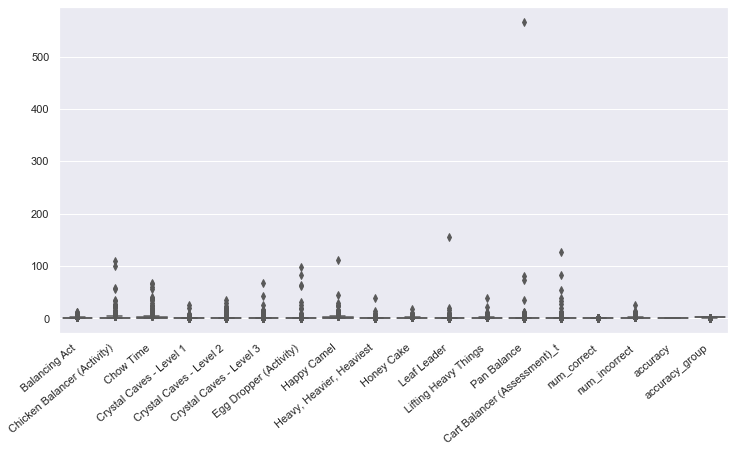

In [131]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=result_cb , orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [132]:
#removing rows , where the user has played a session more than 15 minutes
for i in result_cb.columns:
    if (i!='installation_id'):
        result_cb=result_cb[result_cb[i]<=10]
print(result_cb.shape)

(1986, 19)


In [133]:
result_cb.describe()

,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Cart Balancer (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,0.636959,0.857122,1.334304,1.001511,1.287009,0.32427,0.192197,1.093210,0.073011,0.478852,0.136850,0.582578,0.166746,0.759043,0.850957,0.778953,0.734542,2.276435
std,1.018530,1.267237,1.562414,0.789412,1.072769,0.99853,0.808424,1.371795,0.433144,0.821503,0.658154,0.978602,0.789371,0.678572,0.356221,1.483403,0.389672,1.122977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380000,1.000000,0.000000,0.500000,2.000000
50%,0.000000,0.000000,1.197500,1.000000,1.000000,0.00000,0.000000,0.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550000,1.000000,0.000000,1.000000,3.000000
75%,1.000000,1.450000,1.950000,1.000000,1.000000,0.00000,0.000000,1.890000,0.000000,1.000000,0.000000,1.000000,0.000000,0.860000,1.000000,1.000000,1.000000,3.000000
max,10.000000,10.000000,9.860000,7.000000,10.000000,9.00000,7.390000,9.620000,6.000000,10.000000,7.140000,9.000000,9.480000,8.330000,1.000000,10.000000,1.000000,3.000000


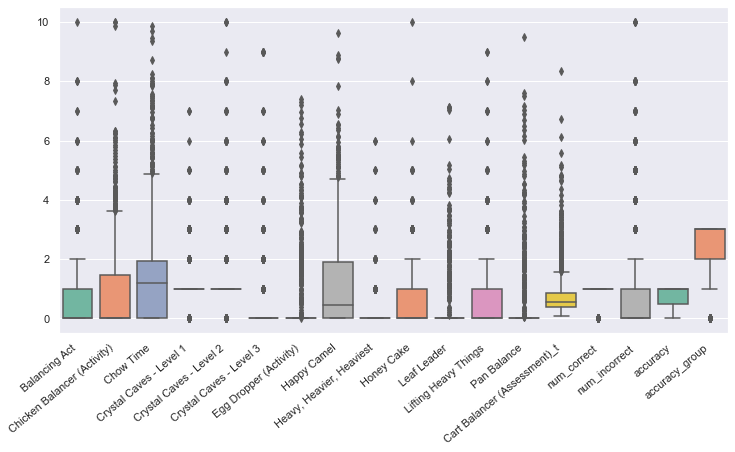

In [134]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=result_cb , orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [135]:
# joining the two assessments into a singale df
print(result_cb.shape)
print(result_cs.shape)
result = pd.concat([result_cb, result_cs],  sort =False)
print(result.shape)


(1986, 19)
(1629, 19)
(3615, 20)


In [136]:
result.head()

,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Cart Balancer (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group,Chest Sorter (Assessment)_t
0,001d0ed0,1,0.00,1.25,1,1,0,0.0,0.98,0,2,0.0,2,0.00,0.35,1,0,1.0,3,NaN
1,002db7e3,0,3.28,4.45,2,2,1,0.0,1.01,0,1,0.0,2,1.89,0.71,1,0,1.0,3,NaN
2,003372b0,1,1.49,3.02,1,1,0,0.0,2.47,0,2,0.0,4,0.00,0.50,1,0,1.0,3,NaN
3,00634433,0,0.00,2.54,1,2,0,0.0,0.00,0,0,0.0,0,0.00,0.51,1,0,1.0,3,NaN
4,00667b88,0,0.00,0.00,3,4,3,0.0,0.00,0,0,0.0,0,0.00,1.11,1,0,1.0,3,NaN


In [137]:
result.isnull().sum()

installation_id                 0   
Balancing Act                   0   
Chicken Balancer (Activity)     0   
Chow Time                       0   
Crystal Caves - Level 1         0   
Crystal Caves - Level 2         0   
Crystal Caves - Level 3         0   
Egg Dropper (Activity)          0   
Happy Camel                     0   
Heavy, Heavier, Heaviest        0   
Honey Cake                      0   
Leaf Leader                     0   
Lifting Heavy Things            0   
Pan Balance                     0   
Cart Balancer (Assessment)_t    1629
num_correct                     0   
num_incorrect                   0   
accuracy                        0   
accuracy_group                  0   
Chest Sorter (Assessment)_t     1986
dtype: int64

In [138]:
#as the values for first assessment is only considered,during merging-the other assessment became nan
result.fillna(0, inplace=True)

In [139]:
#save as csv file
result.loc[ :].to_csv('../data/crystalcaves_final.csv',index=False)